# Summer 2024 Project 


Plotting routine to show the footprint of the ELFIN spacecraft trajectory onto a THEMIS All Sky movie. 

Possible follow up: Poker Flat Inchoerent Scatter Radar (PFISR) field of view in the Poker Flat All Aky Image (ASI) 



Helpful links:
- online database for THEMIS All Sky Cameras: https://data.phys.ucalgary.ca/sort_by_project/THEMIS/asi/stream0/2022/03/05/

- database for the corresponding skymaps: https://data.phys.ucalgary.ca/sort_by_project/THEMIS/asi/skymaps/ 


- info on how to use the skymaps: https://data.phys.ucalgary.ca/sort_by_project/other/documentation/skymap_file_description.pdf 

- online database for the Poker Flat All Sky Imager: http://optics.gi.alaska.edu/realtime/data/MPEG/PKR_DASC_512/


List of times when ELFIN flies over a THEMIS camera:
- in AuroraX - Conjunction Search excel spreadsheet

- we can start with one of the times listed on there, ATHA/FSMI/GAKO...are the locations of each camera

- a north bound trace (nbtrace, tracing the magnetic field line from the spacecraft to the ground) would be ideal to chose as well 



Outline of steps to plot satellite footpoint onto movie: 
1. Open the corresponding skymap for the THEMIS ASI - maps each pixel to a lattitude and longitude

2. Find the footpoint of the ELFIN spacecraft in lattitude and longitiude 

    2a. Use a magnetic field model to find the corresponding footpoint: https://www.ncei.noaa.gov/products/international-geomagnetic-reference-field

    2b. Or the ELFIN lat/lon values will do from emphemris .txt files in the github folder - have to convert to magnetic lat/lon 
    
3. Plot the lat and lon values onto the ASI 



Aurora/ pulsating aurora information: 

-- https://www.meted.ucar.edu/hao/aurora/ 

-- see poster and slides in the github page



In [2]:
# import libraries
import numpy as np
import imageio
from datetime import datetime, timedelta
import importlib
import matplotlib.pyplot as plt



[[[ 31  29  41]
  [248 246 255]
  [231 229 241]
  ...
  [205 213 243]
  [223 225 252]
  [ 18  20  47]]

 [[ 31  29  41]
  [248 246 255]
  [231 229 241]
  ...
  [205 213 243]
  [223 225 252]
  [ 18  20  47]]

 [[ 31  29  41]
  [248 246 255]
  [231 229 241]
  ...
  [205 213 243]
  [223 225 252]
  [ 18  20  47]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


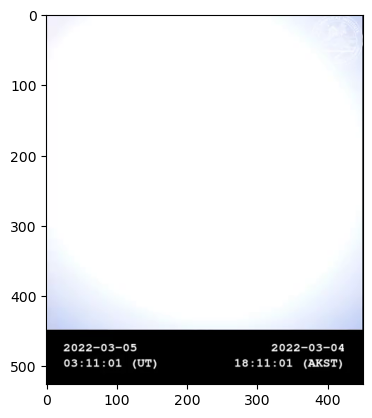

In [3]:
# load in video data: -  for poker flat video
filename = 'PF_allsky_2022_03_05.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')

# open pixel array:
print(vid)
image = vid.get_data(0)
print(image)
fig1,ax0 = plt.subplots()
ax0.imshow(image)

# loop through the whole movie:
for i, im in enumerate(vid):
    image = vid.get_data(i)
    
    #fig1,ax0 = plt.subplots()
    #ax0.imshow(image)

vid.close()